In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import os 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#checking the input
print(os.listdir('./data'))

['POS_CASH_balance.csv', 'bureau_balance.csv', 'previous_application.csv', 'application_test.csv', 'sample_submission.csv', 'application_train.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'bureau.csv', 'credit_card_balance.csv']


In [5]:
# Training data
d_train = pd.read_csv('./data/application_train.csv')
d_train = d_train.sample(frac=0.08)
print('Training data shape: ', d_train.shape)
d_train.head()

Training data shape:  (24601, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
392,100455,0,Cash loans,F,Y,Y,2,135000.0,830214.0,24273.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
174084,301739,0,Cash loans,F,N,Y,0,202500.0,113211.0,6268.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
201462,333532,0,Cash loans,M,Y,Y,1,193500.0,540000.0,25150.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
209285,342567,0,Cash loans,F,Y,N,0,225000.0,755190.0,38556.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
81491,194492,0,Cash loans,F,N,N,0,202500.0,900000.0,38263.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Testing data
d_test = pd.read_csv('./data/application_test.csv')
d_test = d_test.sample(frac=0.20)
print('Training data shape: ', d_test.shape)
d_test.head()

Training data shape:  (9749, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
44808,428204,Cash loans,F,N,Y,3,81000.0,678996.0,32796.0,540000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
43722,418614,Cash loans,M,Y,N,1,202500.0,225000.0,24363.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6366,146570,Cash loans,F,Y,Y,0,202500.0,1024740.0,52452.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
40831,400490,Cash loans,M,Y,N,0,166500.0,296280.0,23539.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
13573,198309,Cash loans,M,N,Y,0,270000.0,351130.5,27301.5,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


Exploratory Data Analysis


In [8]:
lable_distribution = d_train['TARGET'].value_counts()
print(f'{lable_distribution[0]} people successfully paid the loan')
print(f'{lable_distribution[1]} people failed to paid the loan')

22607 people successfully paid the loan
1994 people failed to paid the loan


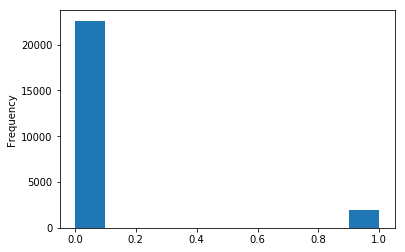

In [10]:
d_train['TARGET'].astype(int).plot.hist();

In [12]:
d_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<h1>Encoding Categorical Variables</h1>

For any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.


In [13]:
le = LabelEncoder()
le_count = 0

for col in d_train:
    if d_train[col].dtype == 'object':
        if len(list(d_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(d_train[col])
            # Transform both training and testing data
            d_train[col] = le.transform(d_train[col])
            d_test[col] = le.transform(d_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


4 columns were label encoded.


In [14]:
d_train = pd.get_dummies(d_train)
d_test = pd.get_dummies(d_test)

print('Training Features shape: ', d_train.shape)
print('Testing Features shape: ', d_test.shape)

Training Features shape:  (24601, 240)
Testing Features shape:  (9749, 235)


In [15]:
train_labels = d_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
d_train, d_test = d_train.align(d_test, join = 'inner', axis = 1)

# Add the target back in
d_train['TARGET'] = train_labels

print('Training Features shape: ', d_train.shape)
print('Testing Features shape: ', d_test.shape)

Training Features shape:  (24601, 236)
Testing Features shape:  (9749, 235)


In [16]:
(d_train['DAYS_BIRTH'] / -365).describe()

count    24601.000000
mean        43.917969
std         11.942511
min         21.041096
25%         34.030137
50%         43.123288
75%         53.947945
max         69.019178
Name: DAYS_BIRTH, dtype: float64

In [17]:
d_train['DAYS_EMPLOYED'].describe()

count     24601.000000
mean      63825.295273
std      141254.768655
min      -17546.000000
25%       -2726.000000
50%       -1207.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

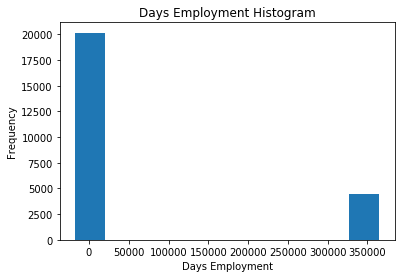

In [18]:
d_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')